In [13]:
import os
from __future__ import print_function

import numpy as np
import pandas as pd
import librosa
import librosa.display
from IPython.display import Audio as IpythonAudio
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
DATA_PATH = '/Users/amr/repos/librosa_gallery/notebooks/processed_maqam_data'
RAW_DATA_PATH= '/Users/amr/repos/librosa_gallery/notebooks/maqamat_data/'

In [81]:
data = np.load(os.path.join(DATA_PATH,'mels.npy'))
target = np.loadtxt(os.path.join(DATA_PATH,'target.txt'), dtype=str, delimiter='\n')
songs_names= np.loadtxt(os.path.join(DATA_PATH,'songs_names.txt'), dtype=str, delimiter='\n')

In [84]:
df= pd.DataFrame({'data': list(data[:,:,:,1]), 'target': target, 'song_name': songs_names}) 
# df= df[~df.target.isin(exclusion_list)].copy()
test_song_names= df.groupby('target')[['song_name']].agg(np.random.choice)['song_name'].tolist()

In [85]:
def get_random_maqam_slice(maqam):
    return np.array(df[df.target== maqam].sample(n=1)['data'].tolist()[0])

In [86]:
maqams_list= list(df.target.unique())

In [87]:
def get_maqam_sheet_music(RAW_DATA_PATH, maqam):
    
    maqam_file= [x for x in os.listdir(os.path.join(RAW_DATA_PATH,maqam)) if x.split('.')[-1] in ['jpg','png']][0]
    
    return os.path.join(RAW_DATA_PATH, maqam, maqam_file)
    

In [88]:
main_maqams=['Rast', '‘Ajam', 'Hijaz', 'Saba', 'Sikah', 'Bayati', 'Kurd', 'Nahawand']

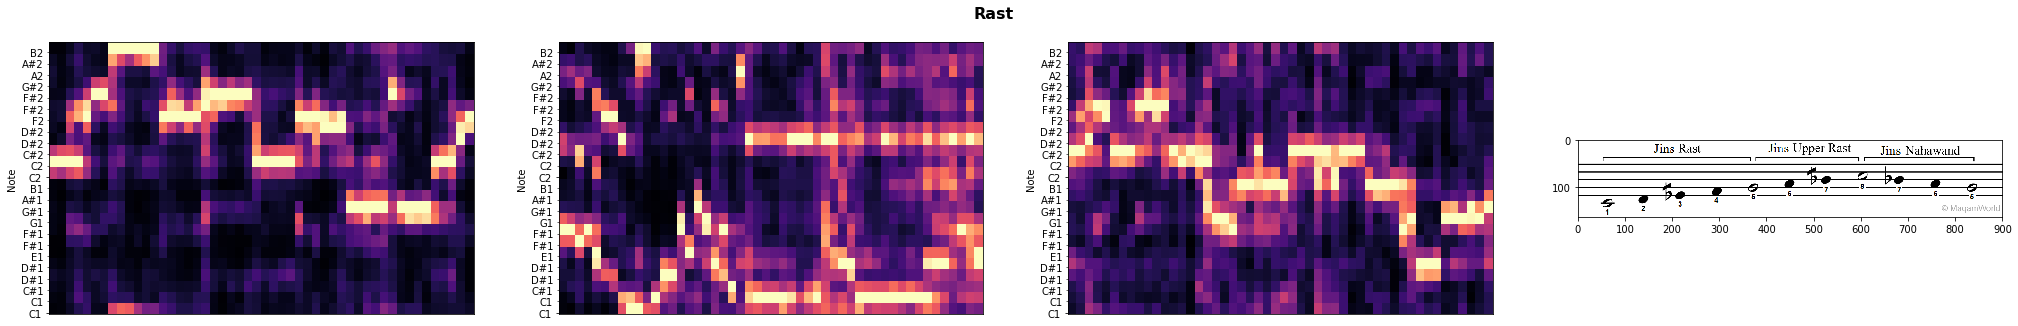

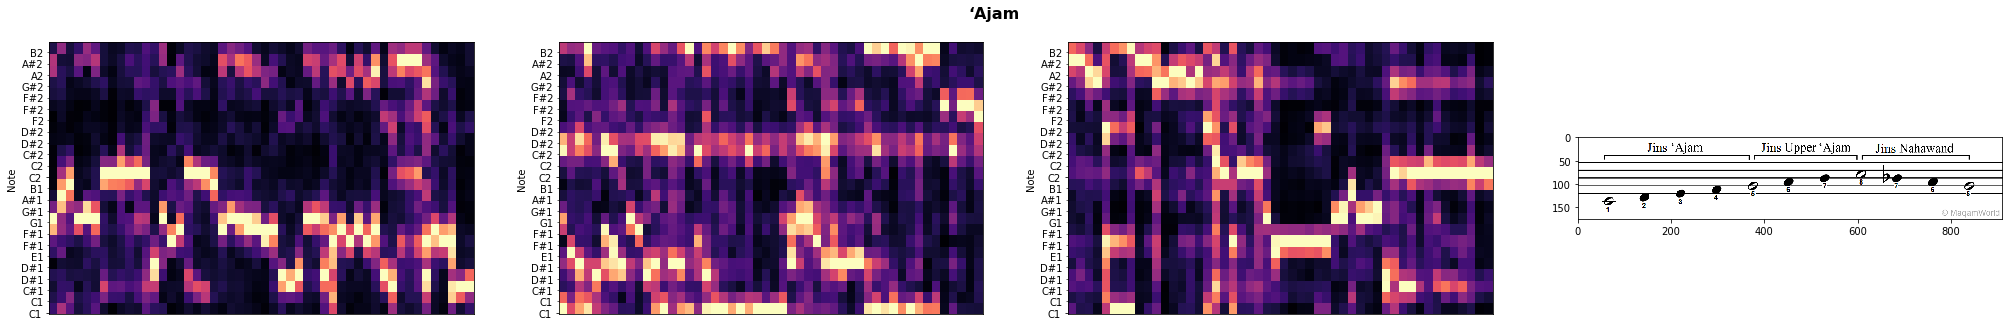

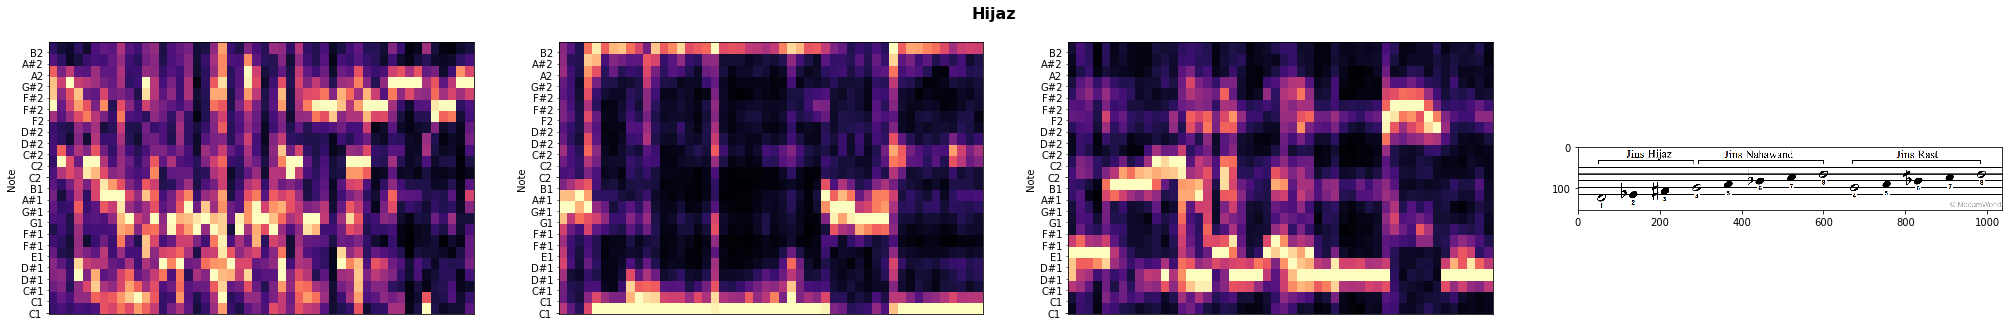

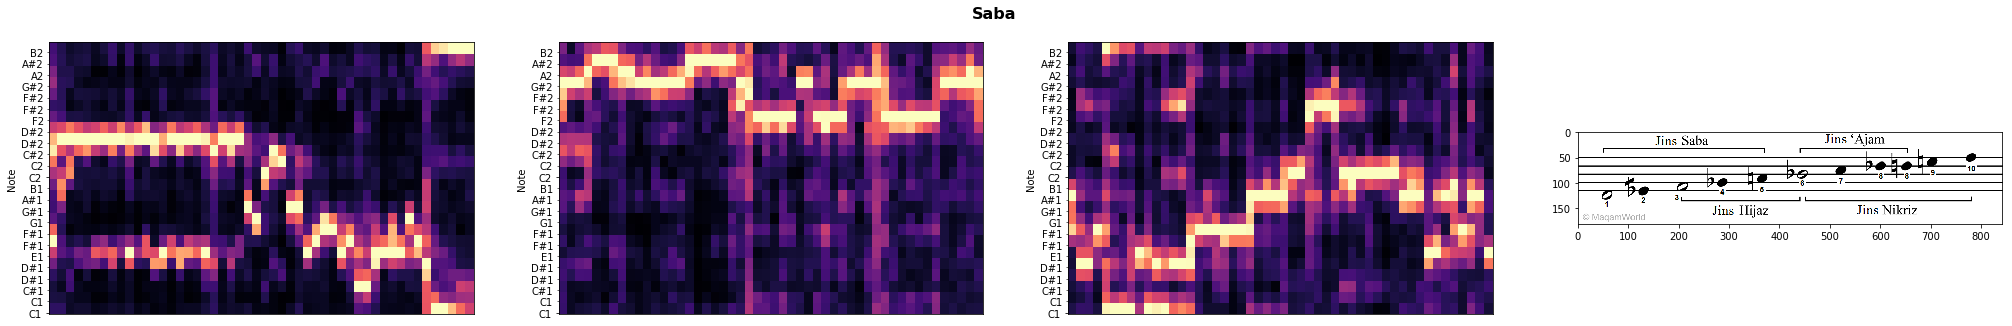

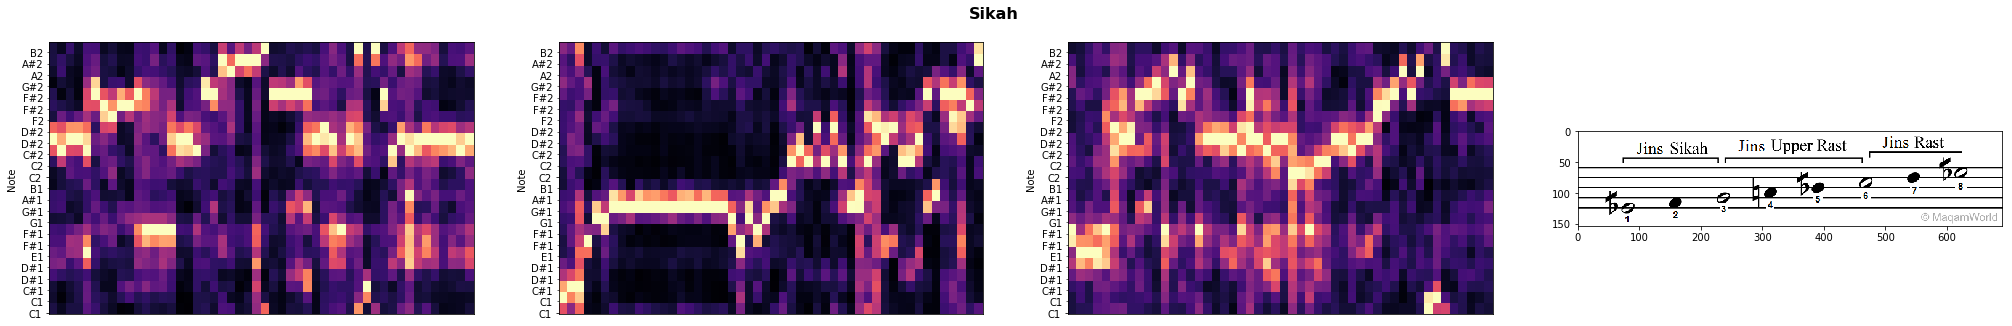

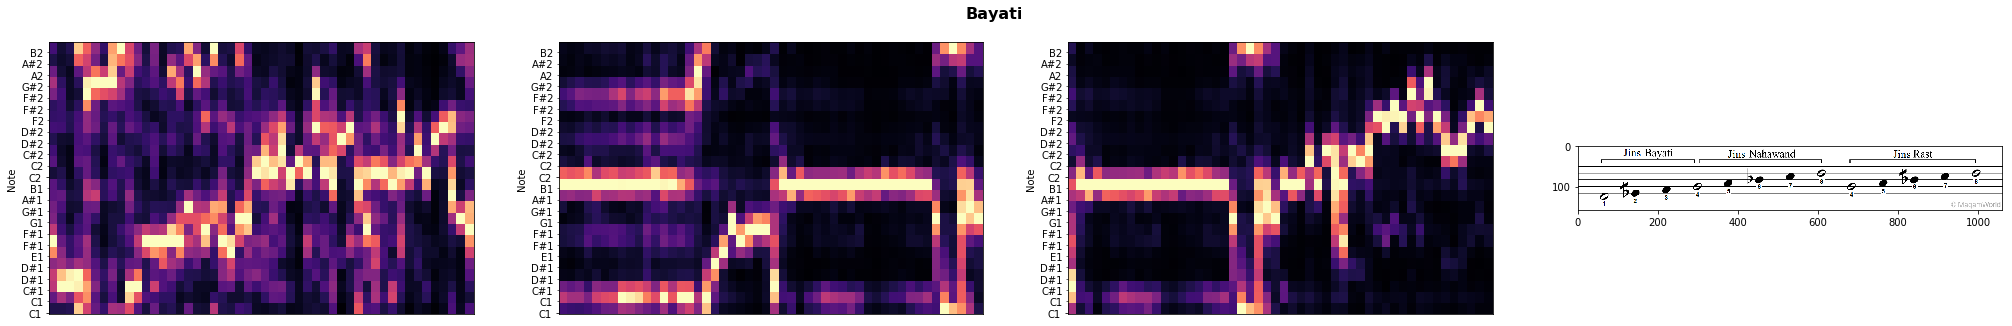

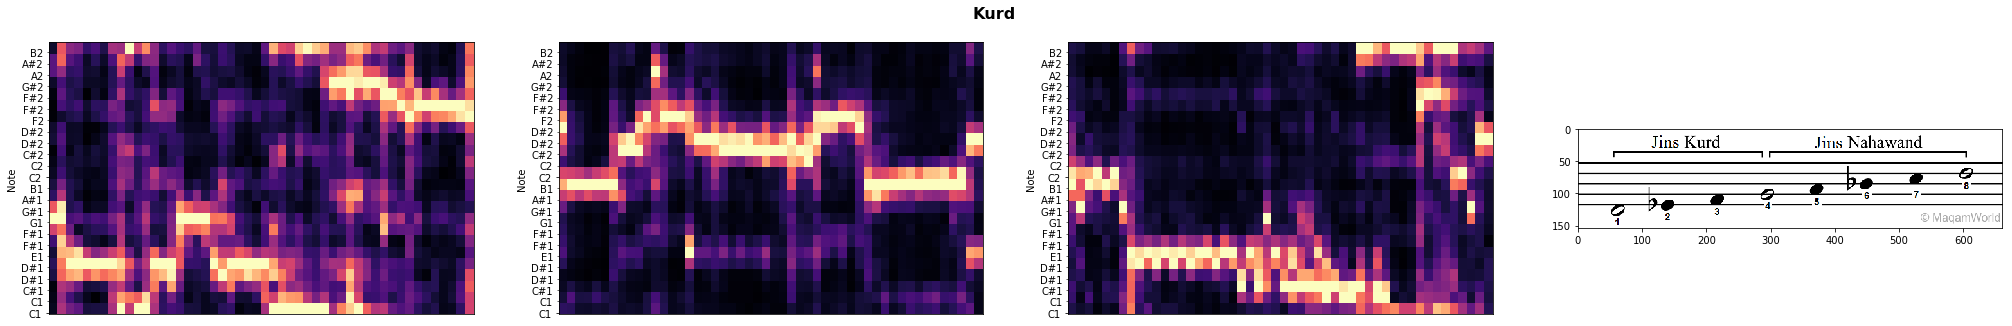

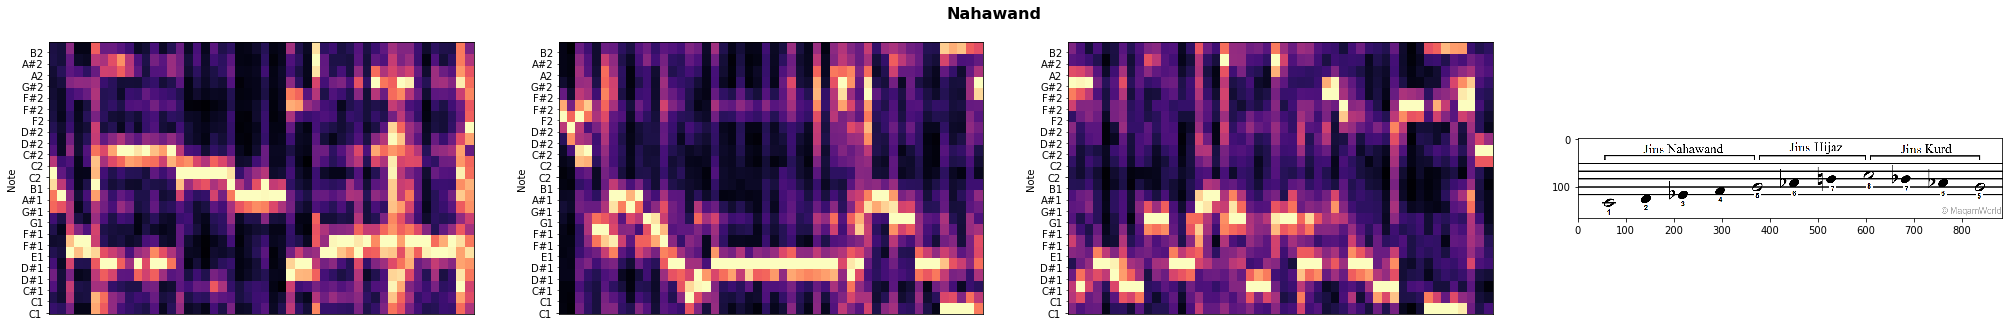

In [91]:
ncols=4


for maqam in main_maqams:
    
    
    
    fig, ax= plt.subplots(ncols=ncols, figsize=(35,5))
    
    fig.suptitle(maqam, fontsize=16, fontweight='bold')
    
    for col in range(ncols - 1):
        
        img= get_random_maqam_slice(maqam)
        librosa.display.specshow(img, x_axis=None, y_axis='cqt_note', ax=ax[col]) #y_axis='mel'
        
    img_path= get_maqam_sheet_music(RAW_DATA_PATH, maqam)
    ax[ncols- 1].imshow(plt.imread(img_path))

    plt.show()


In [92]:
import youtube_dl
import sys


ydl_opts = {
    'format': 'bestaudio/best',
    'postprocessors': [{
        'key': 'FFmpegExtractAudio',
        'preferredcodec': 'mp3',
        'preferredquality': '192',
    }],
}


In [97]:
with youtube_dl.YoutubeDL(ydl_opts) as ydl:
    filenames = ['https://www.youtube.com/watch?v=MJMTsVruYzU', 'https://www.youtube.com/watch?v=MJMTsVruYzU']
    ydl.download(filenames)

[youtube] MJMTsVruYzU: Downloading webpage
[youtube] MJMTsVruYzU: Downloading video info webpage
[youtube] MJMTsVruYzU: Downloading js player vfl22ubNH
[youtube] MJMTsVruYzU: Downloading js player vfl22ubNH
[download] Destination: تقاسيم بياتي - محمد القصبجي-MJMTsVruYzU.m4a
[download] 100% of 2.87MiB in 00:03
[ffmpeg] Correcting container in "تقاسيم بياتي - محمد القصبجي-MJMTsVruYzU.m4a"
[ffmpeg] Destination: تقاسيم بياتي - محمد القصبجي-MJMTsVruYzU.mp3
Deleting original file تقاسيم بياتي - محمد القصبجي-MJMTsVruYzU.m4a (pass -k to keep)
[youtube] MJMTsVruYzU: Downloading webpage
[youtube] MJMTsVruYzU: Downloading video info webpage
[download] Destination: تقاسيم بياتي - محمد القصبجي-MJMTsVruYzU.m4a
[download] 100% of 2.87MiB in 00:02
[ffmpeg] Correcting container in "تقاسيم بياتي - محمد القصبجي-MJMTsVruYzU.m4a"
[ffmpeg] Destination: تقاسيم بياتي - محمد القصبجي-MJMTsVruYzU.mp3
Deleting original file تقاسيم بياتي - محمد القصبجي-MJMTsVruYzU.m4a (pass -k to keep)


In [98]:
!open .